In [1]:
# The aerodynamic conditions at which we trained our model are such that we have a dynamic instability of the wing exposed 
# to the flow (i.e., we have flutter). We should see this instability also in the surrogate model. Please note, that the
# aerodynamic system is ALWAYS stable, there is no such a thing like air that spontaneosly starts to create vortices, thus
# the eigenvalues of the DMD aerodynamic model must always be stable. The instability comes from the eigenvalues of the
# coupled aeroelastic system.

In [2]:
# Here, we use the second possible functioning way of the driver. Thus, we will also create a structural model and we will
# integrate the structural equations of motion together with the aerodynamic rom. Please note that python is extremely flexible
# and it is easy to add other structural solvers in this step.

Creating the physical model.
Importing the data from the files.
Obtaining the normals to the different panels.
Completed reading
Obtaining the mode shapes
Starting with the undeformed condition
Obtain now the deformation due to modes
Opened file 1 of 2
Opened file 2 of 2
Completed reading
Done


Creating the database for the reduced order model.
Importing the data from the files.
Opened structural history file data/blendedStep/StructHistoryModal.dat.
Completed reading
Starting the reading of surface_flow.csv files.
Opened time iter 1099 last time iter is 1099
Completed reading
Done


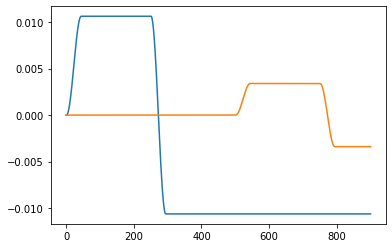

Please select steady state for mode 0:
450
Please select steady state for mode 1:
850


Configuring the structural solver for FSI simulation
The structural model is undamped
Creating the structural model
Opened punch file data/modal.pch.
Modal stiffness and mass matrices are diagonal
Using 2 degrees of freedom
Setting the integration parameters
Setting initial conditions.
Time iter	q1	qdot1	qddot1	q2	qdot2	qddot2	
3759	0.6283	8.6348	-367.4354	-0.1837	-3.3367	94.0239			
Completed time integration


In [3]:
# Again, only one line is required to launch the creation of the system and the solution process
# Note that, in this case, as the forces are directly applied inside the driver to the structural system, the output file
# will contain the modal amplitudes
import os
os.chdir("..")
import driver
os.chdir("Tutorials")

driver.main("data/configTutorial5.cfg")

In [4]:
# The great power of this method is the strong reduction in computational time that already provides a gain with the first
# simulation. In other words: when building a reduced order model it must be taken into account a significant expense to
# create the required training set. This is even more compelling for neural network application, where the training of the
# net is justified only if several full simulations will be run with that later. In this case, as we only need
# a very short simulation to gain all the required information, the cost for training is already offset with the first full
# simulation, meaning that it will always be convenient to use the DMDc ROM.
# To put it into numbers: the training required around 30 minutes, most of which where due to the reading of the database from
# file. The time integration with the reduced order model lasted 1 hour. This was done on a personal computer with medium
# performances. The training signal was generated using 40 cores of a cluster, and it took 62 hours. The total is 63.5 hours.
# On the other hand, the full simulation to predict flutter with the CFD model took 180 hours.

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


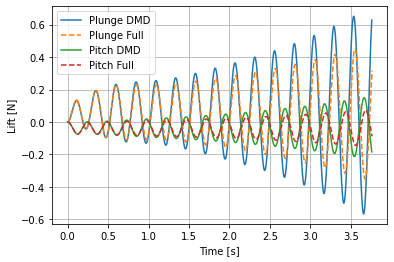

In [7]:
# We now plot the first two modes to verify that indeed we see a slightly unstable behaviour. We also compare with the
# results from the full simulation
mode0 = []
mode1 = []
with open("data/outputsTutorial5.dat") as file:
    headerline = file.readline()
    line = file.readline()
    while True:
        if not line:
            break
        line.strip("\r\n")
        line = line.split()
        mode0.append(float(line[1]))
        mode1.append(float(line[4]))
        line = file.readline()
        
mode0_ref = []
mode1_ref = []
with open("data/inputsTutorial4.dat") as file:
    headerline = file.readline()
    line = file.readline()
    while True:
        if not line:
            break
        line.strip("\r\n")
        line = line.split()
        mode0_ref.append(float(line[3]))
        mode1_ref.append(float(line[6]))
        line = file.readline()

from matplotlib import pyplot as plt
import numpy as np

plt.plot(0.001*np.linspace(0,len(mode0)-1,len(mode0)), mode0, '-')
plt.plot(0.001*np.linspace(0,len(mode0_ref)-1,len(mode0_ref)), mode0_ref, '--')
plt.plot(0.001*np.linspace(0,len(mode1)-1,len(mode1)), mode1, '-')
plt.plot(0.001*np.linspace(0,len(mode1_ref)-1,len(mode1_ref)), mode1_ref, '--')
# just make the plot pretty
plt.xlabel("Time [s]")
plt.ylabel("Lift [N]")
plt.legend(["Plunge DMD","Plunge Full","Pitch DMD","Pitch Full"])
plt.grid()
plt.savefig('tutorial5.eps', format='eps')